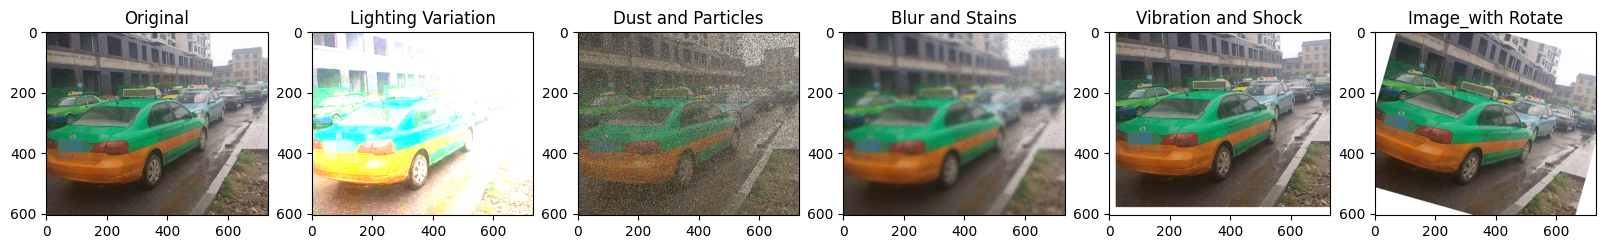

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def add_lighting_variation(image, scale_range=(0.5, 1.5)):
    scale_factor = np.random.uniform(*scale_range)
    noisy = image * scale_factor
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_dust_and_particles(image, dust_prob=0.1, particle_prob=0.05):
    noisy = np.copy(image)

    # Dust
    dust_mask = np.random.rand(*image.shape[:2]) < dust_prob
    dusty_pixels = np.random.randint(150, 200, image.shape[2])  # RGB values for dust
    noisy[dust_mask] = dusty_pixels

    # Particles
    particle_mask = np.random.rand(*image.shape[:2]) < particle_prob
    particle_pixels = np.random.randint(50, 100, image.shape[2])  # RGB values for particles
    noisy[particle_mask] = particle_pixels

    return noisy.astype(np.uint8)

def add_blur_and_stains(image, blur_factor=5):
    # Gaussian blur
    blurred = cv2.GaussianBlur(image, (blur_factor, blur_factor), 0)

    # Stains (random dark spots)
    stain_mask = np.random.rand(*image.shape[:2]) < 0.02
    stained_pixels = np.random.randint(0, 50, image.shape[2])  # RGB values for stains
    blurred[stain_mask] = stained_pixels

    return blurred.astype(np.uint8)

def add_vibration_and_shock(image, vibration_factor=5):
    # Simulate vibration and shock
    rows, cols, _ = image.shape
    x_shift = np.random.randint(-vibration_factor, vibration_factor)
    y_shift = np.random.randint(-vibration_factor, vibration_factor)

    matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shaken = cv2.warpAffine(image, matrix, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    return shaken.astype(np.uint8)

def add_persistent_vibration(image, frequency=5, amplitude=5, persistence=0.8):
    global prev_frame

    rows, cols, _ = image.shape

    # 이전 프레임이 없으면 현재 프레임을 이전 프레임으로 설정
    if prev_frame is None:
        prev_frame = np.copy(image)

    x = np.arange(cols)
    y = amplitude * np.sin(2 * np.pi * frequency * x / cols)

    for i in range(rows):
        # 현재 프레임에 이전 프레임의 일부를 혼합하여 잔상을 남김
        image[i, :] = (1 - persistence) * image[i, :] + persistence * prev_frame[i, :]
        image[i, :] = np.roll(image[i, :], int(y[i]))

    # 현재 프레임을 이전 프레임으로 업데이트
    prev_frame = np.copy(image)

    return image

def add_rotate(image, angle_range=(-10, 10)):
    # 무작위로 회전 각도를 선택
    angle = np.random.uniform(*angle_range)

    # 이미지의 중심을 기준으로 회전하기 위해 중심 좌표를 계산
    height, width = image.shape[:2]
    center = (width // 2, height // 2)

    # 회전 변환 매트릭스 생성
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # 이미지 회전
    rotated = cv2.warpAffine(image, rotation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    return rotated

# 예제 이미지 로드
image_path = "./data/vc/train/taxi/0b2ea1e3d263b4510e1a9754c25069e9.jpg"
original_image = cv2.imread(image_path)

prev_frame = None

# 각 노이즈 추가
image_with_lighting_variation = add_lighting_variation(original_image, scale_range=(0.2, 8.0))
image_with_dust_and_particles = add_dust_and_particles(original_image, dust_prob=0.2, particle_prob=0.4)
image_with_blur_and_stains = add_blur_and_stains(original_image, blur_factor=27)
image_with_vibration_and_shock = add_vibration_and_shock(original_image, vibration_factor=100)
image_with_rotated = add_rotate(original_image, angle_range=(-20, 20))

# 결과를 시각화
plt.figure(figsize=(20, 20))
plt.subplot(1, 6, 1)
plt.title("Original")
plt.imshow(original_image[:, :, ::-1])

plt.subplot(1, 6, 2)
plt.title("Lighting Variation")
plt.imshow(image_with_lighting_variation[:, :, ::-1])

plt.subplot(1, 6, 3)
plt.title("Dust and Particles")
plt.imshow(image_with_dust_and_particles[:, :, ::-1])

plt.subplot(1, 6, 4)
plt.title("Blur and Stains")
plt.imshow(image_with_blur_and_stains[:, :, ::-1])

plt.subplot(1, 6, 5)
plt.title("Vibration and Shock")
plt.imshow(image_with_vibration_and_shock[:, :, ::-1])

plt.subplot(1, 6, 6)
plt.title("Image_with Rotate")
plt.imshow(image_with_rotated[:, :, ::-1])

plt.show()
